In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x19338816c18>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [21]:
conn = engine.connect()
statement = pd.read_sql("select * from measurement", conn)
statement.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [24]:
session.query(func.max(Measurement.date)).all()

[('2017-08-23')]

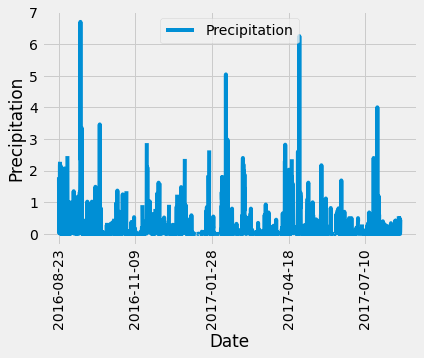

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
lastyear = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= lastyear).all() 


# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = pd.DataFrame(result, columns=["Date", "Precipitation"])
precipitation.set_index("Date", inplace=True)


# Sort the dataframe by date
precipitation1 = precipitation.sort_values("Date")
precipitation1


# Use Pandas Plotting with Matplotlib to plot the data
precipitation1.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()


In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation1.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [37]:
station_statement = pd.read_sql("select * from station", conn)
station_statement.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [40]:
# Design a query to calculate the total number stations in the dataset
station_result = session.query(func.count(Station.station)).all()
station_result

[(9)]

In [45]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
top_station = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
top_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_observation_station = print(top_station[0] )
most_observation_station

('USC00519281', 2772)


In [77]:
top_station_temp =  session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == "USC00519281").all() 
top_station_temp

[('USC00519281', 70.0),
 ('USC00519281', 62.0),
 ('USC00519281', 74.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 76.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 70.0),
 ('USC00519281', 75.0),
 ('USC00519281', 64.0),
 ('USC00519281', 60.0),
 ('USC00519281', 61.0),
 ('USC00519281', 68.0),
 ('USC00519281', 64.0),
 ('USC00519281', 66.0),
 ('USC00519281', 67.0),
 ('USC00519281', 70.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 69.0),
 ('USC00519281', 60.0),
 ('USC00519281', 75.0),
 ('USC00519281', 75.0),
 ('USC00519281', 65.0),
 ('USC00519281', 75.0),
 ('USC00519281', 69.0),
 ('USC00519281', 67.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 72.0),
 ('USC00519281', 67.0),
 ('USC00519281', 65.0),
 ('USC00519281', 64.0),
 ('USC00519281', 67.0),
 ('USC00519281', 67.0),
 ('USC00519281', 68.0),
 ('USC00519281', 69.0),
 ('USC00519281', 66.0),
 ('USC00519281', 69.0),
 ('USC00519281', 61.0),
 ('USC00519281',

In [73]:
top_station_temp_avg =  session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
top_station_temp_avg

[(71.66378066378067)]

In [74]:
top_station_temp_max =  session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
top_station_temp_max

[(85.0)]

In [75]:
top_station_lowest_temp =  session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
top_station_lowest_temp

[(54.0)]

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_result = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= lastyear, Measurement.station == "USC00519281").all() 
temp_result

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [95]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temperature = pd.DataFrame(temp_result, columns=["Date", "Temperature"])
temperature.set_index("Date", inplace=True)


# Sort the dataframe by date
temperature2 = temperature.sort_values("Date")
temperature2


,Temperature
Date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


In [100]:
temperature3 = temperature.reset_index(drop=True)
#df.reset_index(drop=True, inplace=True)
temperature3.set_index("Temperature", inplace=True)
temperature3

""
Temperature
77.0
77.0
80.0
80.0
75.0
...
77.0
77.0
76.0


In [89]:
N_points = temperature['Temperature']
n_bins = 12

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(top_station_temp_max) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

TypeError: 'Series' object cannot be interpreted as an integer

# Close session

In [ ]:
# Close Session
session.close()